<a href="https://colab.research.google.com/github/illhyhl1111/SNU_ML2021/blob/main/Lab3_1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset

import torchvision
from torchvision import datasets
from torchvision import transforms

from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Training dataset 직접 만들기

1. Download dataset from https://github.com/illhyhl1111/AI_Expert_2021/blob/main/toy_dataset.zip
2. Load dataset as trainset
3. Transform image (hint: https://pytorch.org/vision/stable/transforms.html)
  * Change image to Tensor (hint: `ToTensor`)
  * Randomly crop image with size 800 by 800 (hint: `RandomCrop`)
  * Resize image to 224 by 224 (hint: `Resize`)
  * Randomly rotate image in range [-90, 90] 
  * Change image to grayscale with 3 channels 
  

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomCrop((800, 800)),
    transforms.Resize((224, 224)),
    transforms.RandomRotation((-90, 90)),           # 이 부분은 빼 주시면 됩니다
    transforms.Grayscale(num_output_channels=3)     # 이 부분은 빼 주시면 됩니다
])

trainset = datasets.ImageFolder('/content/drive/MyDrive/Colab Notebooks/AI_Expert_2021/dataset',transform=transform)

tensor([1, 0, 1, 0])


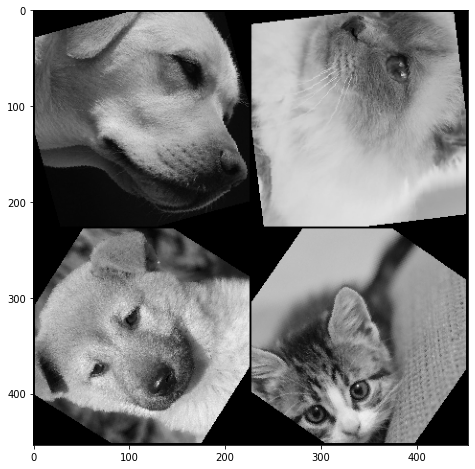

In [ ]:
args = {
    'num_workers' : 1,
    'batch_size' : 4,
    'shuffle' : True,
}

train_loader = DataLoader(trainset,**args)

img, label = next(iter(train_loader))
plt.figure(figsize = (8,8))
plt.imshow(torchvision.utils.make_grid(img, nrow=2).permute(1, 2, 0))
print(label)

### Pretrained model 로딩하기

In [ ]:
alexnet = torchvision.models.alexnet(pretrained=True)
out = alexnet(img)
print(out.shape)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

torch.Size([4, 1000])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
class SuperSimpleClassifier(nn.Module):
  def __init__(self,func=None):
    super(SuperSimpleClassifier, self).__init__()
    self.alexnet = torchvision.models.alexnet(pretrained=True)   # pretrained alexnet을 불러옴
    self.fc1 = nn.Linear(1000, 2)
    nn.init.xavier_uniform_(self.fc1.weight, gain=0.5)
    nn.init.constant_(self.fc1.bias, 0.1)
  
  def forward(self, x):
    x = self.alexnet(x)
    x = self.fc1(x.detach())
    x = torch.softmax(x,dim=-1)
    return x


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomCrop((800, 800)),
    transforms.Resize((224, 224))
])

trainset = datasets.ImageFolder('/content/drive/MyDrive/Colab Notebooks/AI_Expert_2021/dataset',transform=transform)
train_loader = DataLoader(trainset,**args)

model = SuperSimpleClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.fc1.parameters(),lr=0.001)

In [ ]:
def compute_acc(argmax,y):
    count = 0
    for i in range(len(argmax)):
        if argmax[i]==y[i]:
            count+=1
    return count / len(argmax)

In [ ]:
for epoch in range(20):
    
    for x,y in train_loader:
        optimizer.zero_grad()
        y_ = model(x)
        loss = loss_fn(y_, y)
        loss.backward()
        optimizer.step()
        
    print("Epoch {}, Loss(train) : {}".format(epoch+1,loss.item()))
    if epoch % 2 == 1:
        _, argmax = torch.max(y_,dim=-1)
        test_acc = compute_acc(argmax,y.numpy())
        
        print("Acc(val) : {}".format(test_acc))

Epoch 1, Loss(train) : 0.7618446946144104
Epoch 2, Loss(train) : 0.5072438716888428
Acc(val) : 1.0
Epoch 3, Loss(train) : 0.550254762172699
Epoch 4, Loss(train) : 0.44105830788612366
Acc(val) : 0.75
Epoch 5, Loss(train) : 0.32785406708717346
Epoch 6, Loss(train) : 0.31771379709243774
Acc(val) : 1.0
Epoch 7, Loss(train) : 0.31723344326019287
Epoch 8, Loss(train) : 0.3146841824054718
Acc(val) : 1.0
Epoch 9, Loss(train) : 0.32172897458076477
Epoch 10, Loss(train) : 0.32424449920654297
Acc(val) : 1.0
Epoch 11, Loss(train) : 0.3642660975456238
Epoch 12, Loss(train) : 0.3156290054321289
Acc(val) : 1.0
Epoch 13, Loss(train) : 0.3134711980819702
Epoch 14, Loss(train) : 0.31457167863845825
Acc(val) : 1.0
Epoch 15, Loss(train) : 0.3237503170967102
Epoch 16, Loss(train) : 0.3136623501777649
Acc(val) : 1.0
Epoch 17, Loss(train) : 0.31390005350112915
Epoch 18, Loss(train) : 0.31381142139434814
Acc(val) : 1.0
Epoch 19, Loss(train) : 0.3133012354373932
Epoch 20, Loss(train) : 0.31335848569869995
Acc(